In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('RAW_recipes.csv')

In [3]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [11]:
# Searching String

sub = 'butter chicken'

# Creating and passing series to new column

new_df = df[df['name'].str.contains(sub, na=False)]
new_df = new_df.iloc[:1]
new_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
1568,5 minute butter chicken,258419,10,322217,2007-10-11,"['curries', '15-minutes-or-less', 'time-to-mak...","[471.9, 59.0, 9.0, 10.0, 49.0, 88.0, 2.0]",8,['mix together all the spices and toss through...,"a very quick, easy and oh so tasy chicken dish...","['chicken', 'butter', 'garlic cloves', 'onion'...",12


In [12]:
# Creating a table

data = {'name': ['butter chicken','italian pasta'],
       'chciken': ['NA','NA'],
       'beef': ['NA','NA'],
       'cheese': ['NA','NA']}
data = pd.DataFrame(data, columns = ['name','chicken','beef','cheese'])


In [13]:
data.head()

,name,chicken,beef,cheese
0,butter chicken,NaN,NA,NA
1,italian pasta,NaN,NA,NA


In [14]:
print(new_df.ingredients)

1568    ['chicken', 'butter', 'garlic cloves', 'onion'...
Name: ingredients, dtype: object


In [80]:


if (new_df['ingredients'].str.contains("chicken", na=False)).bool():
    data.iloc[0,1] = 1
else:
    data.iloc[0,1] = 0

if (new_df['ingredients'].str.contains("beef", na=False)).bool():
    data.iloc[0,2] = 1
else:
    data.iloc[0,2] = 0

    
if (new_df['ingredients'].str.contains("cheese", na=False)).bool():
    data.iloc[0,3] = 1
else:
    data.iloc[0,3] = 0

In [104]:
data = df[:1000]
data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [77]:
range(2)

range(0, 2)

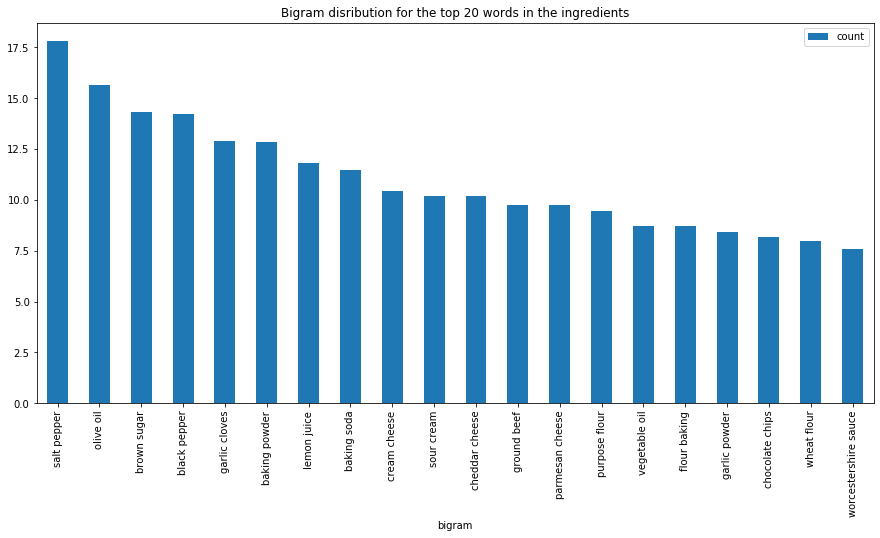

In [105]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(data['ingredients'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the ingredients", figsize = (15,7), )

In [106]:
cosine_similarity = linear_kernel(tfidf_matrix,tfidf_matrix)

In [119]:
indices = pd.Series(data.index, index=data['name']).drop_duplicates()


name
arriba   baked winter squash mexican style    0
a bit different  breakfast pizza              1
all in the kitchen  chili                     2
alouette  potatoes                            3
amish  tomato ketchup  for canning            4
apple a day  milk shake                       5
aww  marinated olives                         6
backyard style  barbecued ribs                7
bananas 4 ice cream  pie                      8
beat this  banana bread                       9
dtype: int64

In [137]:
def get_recommendations(name, cosine_similarity=cosine_similarity):
    # Get the index of the food that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all food with that food
    sim_scores = list(enumerate(cosine_similarity[idx]))

    # Sort the food based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar food
    sim_scores = sim_scores[1:11]

    # Get the food indices
    food_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar food
    return data['name'].iloc[food_indices]

In [138]:
sub = 'a bit different  breakfast pizza'
get_recommendations(sub)

595                     big mac  pizza
737    1 bowl 1 person mashed potatoes
425        indian  macaroni and cheese
397     granny squash   creamed squash
869             100 year old pie crust
484                    oh boy  waffles
433         jiffy  deluxe pizza sticks
138                      lplermagronen
391                   gilded  zucchini
924                          1234 cake
Name: name, dtype: object